# **SENTIMENT ANALYSIS**

importing libraries

In [6]:
import numpy as np
import pandas as pd
import nltk
import re
import emoji
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

load scrap dataset

In [2]:
df_scrap = pd.read_csv('C:/Users/Nafi Kareem/OneDrive/Dokumen/Data MIning/Text Mining/Sentiment Analysis Projects/data_scrap_UM.csv')
df_scrap

,NBa7we src,d4r55,RfnDt,eaLgGf,hCCjke,rsqaWe,wiI7pd,dSlJg,dSlJg 2,znYl0,znYl0 2
0,https://lh3.googleusercontent.com/a-/ALV-UjWce...,Putri Hilaliyah,Local Guide · 30 ulasan · 33 foto,,,3 bulan lalu,"Salah satu kampus populer di malang, orang² ny...",,,Bagikan,NaN
1,https://lh3.googleusercontent.com/a-/ALV-UjWQ5...,Rifky Anindika,Local Guide · 230 ulasan · 768 foto,,,sebulan lalu,Berkunjung kesini untuk mengantar Adik kuliah ...,,,Bagikan,Suka
2,https://lh3.googleusercontent.com/a-/ALV-UjXTq...,Rokhmad Fajar Setiyo,Local Guide · 14 ulasan · 15 foto,,,seminggu lalu,"Kampus yg bersih, adem enak buat nongkrong di ...",,,Bagikan,Suka
3,https://lh3.googleusercontent.com/a-/ALV-UjVe4...,Djunaidi Natan,154 ulasan · 137 foto,,,3 bulan lalu,Minggu pagi coba jalan pagi bersama istri di l...,,,Bagikan,Suka
4,https://lh3.googleusercontent.com/a-/ALV-UjVDg...,Widjokongko Hananto,Local Guide · 60 ulasan · 108 foto,,,5 bulan lalu,Fakultas Vokasi masih baru dan perlu ditata ke...,,,Bagikan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1640,https://lh3.googleusercontent.com/a-/ALV-UjUow...,Fitron Himover,NaN,,,5 tahun lalu,NaN,NaN,NaN,NaN,NaN
1641,https://lh3.googleusercontent.com/a-/ALV-UjVAF...,Abiria Bagus Issari,2 ulasan,,,3 tahun lalu,NaN,NaN,NaN,NaN,NaN
1642,https://lh3.googleusercontent.com/a/ACg8ocLrg2...,idas salim,3 ulasan · 5 foto,,,4 tahun lalu,NaN,NaN,NaN,NaN,NaN
1643,https://lh3.googleusercontent.com/a-/ALV-UjX_w...,SITI LAILATUL ISNAINI,13 foto,,,3 tahun lalu,NaN,NaN,NaN,NaN,NaN


take only 'wiI7pd' columns and rename it into 'review'

In [3]:
df = pd.DataFrame(df_scrap['wiI7pd'])

In [4]:
df.rename(columns={'wiI7pd':'review'},inplace=True)
df

,review
0,"Salah satu kampus populer di malang, orang² ny..."
1,Berkunjung kesini untuk mengantar Adik kuliah ...
2,"Kampus yg bersih, adem enak buat nongkrong di ..."
3,Minggu pagi coba jalan pagi bersama istri di l...
4,Fakultas Vokasi masih baru dan perlu ditata ke...
...,...
1640,NaN
1641,NaN
1642,NaN
1643,NaN


remove missing values

In [5]:
df.isna().sum()

review    164
dtype: int64

In [6]:
df = df.dropna().reset_index(drop=True)

In [7]:
df.isna().sum()

review    0
dtype: int64

## **Preprocessing**

case folding

In [8]:
df['review'] = df['review'].str.lower()

print('Case Folding Result : \n')
print(df['review'].head(5))
print('\n\n\n')

Case Folding Result : 

0    salah satu kampus populer di malang, orang² ny...
1    berkunjung kesini untuk mengantar adik kuliah ...
2    kampus yg bersih, adem enak buat nongkrong di ...
3    minggu pagi coba jalan pagi bersama istri di l...
4    fakultas vokasi masih baru dan perlu ditata ke...
Name: review, dtype: object






Cleaning Data (punctuation, emoticon and symbols)

In [9]:
def preprocessing(text):
    text = text.encode('ascii','ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    text = re.sub(r'[_(){}[]]+','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#[A-Za-z0-9]+','',text)
    text = re.sub(r'_[A-Za-z0-9]+','',text)
    text = re.sub(r'-[A-Za-z0-9]+','',text)
    text = re.sub(r':[A-Za-z0-9]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub(r'\d+','',text)
    text = re.sub(r'@+','',text)
    text = re.sub(r':+','',text)
    text = re.sub(r',+','',text)
    text = re.sub(r'_+','',text)
    text = re.sub(r'[!”#$%&’²()*+,-./:;<=>?@[\]^''{|}~]', '', text)
    text = text.lower()
    allemot = [str for str in text]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    text = ' '.join([str for str in text.split()if not any (y in str for str in listemot)])
    return text


df['review'] = df['review'].apply(preprocessing)
df

,review
0,salah satu kampus populer di malang orang nya ...
1,berkunjung kesini untuk mengantar adik kuliah ...
2,kampus yg bersih adem enak buat nongkrong di s...
3,minggu pagi coba jalan pagi bersama istri di l...
4,fakultas vokasi masih baru dan perlu ditata ke...
...,...
1476,um prikitew
1477,bagut
1478,yuhu
1479,yapppp dan


In [10]:
import deep_translator
from deep_translator import GoogleTranslator

translator = deep_translator.GoogleTranslator()
df['review'] = df['review'].astype(str)
df['review'] = df['review'].apply(translator.translate, src='auto', dest='en')
df

,review
0,"one of the popular campuses in Malang, the peo..."
1,I visited here to take my sister to study here...
2,The clean campus is cool and nice for hanging ...
3,"Sunday morning, try going for a morning walk w..."
4,The vocational faculty is still new and needs ...
...,...
1476,a prikitew
1477,baguette
1478,yuhu
1479,yeppp and


**Sentiment using TextBLob**

In [11]:
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda text:  TextBlob(text).sentiment.polarity)
df

,review,polarity
0,"one of the popular campuses in Malang, the peo...",0.275000
1,I visited here to take my sister to study here...,0.537500
2,The clean campus is cool and nice for hanging ...,0.438889
3,"Sunday morning, try going for a morning walk w...",0.359722
4,The vocational faculty is still new and needs ...,0.145455
...,...,...
1476,a prikitew,0.000000
1477,baguette,0.000000
1478,yuhu,0.000000
1479,yeppp and,0.000000


In [12]:
df.loc[df['polarity']> 0.0, 'sentiment'] = "Positive"
df.loc[df['polarity']< 0.0, 'sentiment'] = "Negative"

In [13]:
df = df[['review', 'polarity','sentiment']]
df.head()

,review,polarity,sentiment
0,"one of the popular campuses in Malang, the peo...",0.275000,Positive
1,I visited here to take my sister to study here...,0.537500,Positive
2,The clean campus is cool and nice for hanging ...,0.438889,Positive
3,"Sunday morning, try going for a morning walk w...",0.359722,Positive
4,The vocational faculty is still new and needs ...,0.145455,Positive


In [14]:
df.drop(df.loc[df['polarity']==0.00000].index, inplace=True)
df

,review,polarity,sentiment
0,"one of the popular campuses in Malang, the peo...",0.275000,Positive
1,I visited here to take my sister to study here...,0.537500,Positive
2,The clean campus is cool and nice for hanging ...,0.438889,Positive
3,"Sunday morning, try going for a morning walk w...",0.359722,Positive
4,The vocational faculty is still new and needs ...,0.145455,Positive
...,...,...,...
1455,beautiful and beautiful,0.850000,Positive
1459,beautiful campus,0.850000,Positive
1470,Good,0.700000,Positive
1473,best campus,1.000000,Positive


In [15]:
df['sentiment'].value_counts()

Positive    961
Negative     57
Name: sentiment, dtype: int64

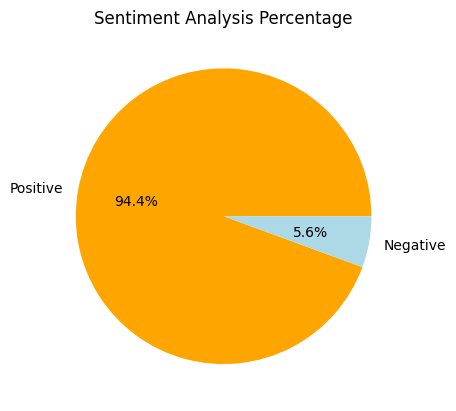

In [16]:
import matplotlib.pyplot as plt

# Define the colors for positive and negative sentiments
colors = ['orange', 'lightblue']

# Calculate the percentage of each sentiment
percentages = df['sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# Create the pie chart
plt.pie(df['sentiment'].value_counts(), labels=df['sentiment'].value_counts().index, autopct=lambda pct: '{:1.1f}%'.format(pct), colors=colors)

# Add a title and labels
plt.title('Sentiment Analysis Percentage')
# Show the plot
plt.show()

In [18]:
def preprocessing(text):


    text = re.sub(r'[!”#$%&’²()*+,-./:;<=>?@[\]^''{|}~]', '', text)
    text = text.lower()


    return text

df['review'] = df['review'].apply(preprocessing)
df

,review,polarity,sentiment
0,one of the popular campuses in malang the peop...,0.275000,Positive
1,i visited here to take my sister to study here...,0.537500,Positive
2,the clean campus is cool and nice for hanging ...,0.438889,Positive
3,sunday morning try going for a morning walk wi...,0.359722,Positive
4,the vocational faculty is still new and needs ...,0.145455,Positive
...,...,...,...
1455,beautiful and beautiful,0.850000,Positive
1459,beautiful campus,0.850000,Positive
1470,good,0.700000,Positive
1473,best campus,1.000000,Positive


In [19]:
df.to_csv('translated_data.csv',index=False)

In [2]:
df = pd.read_csv("C:/Users/Nafi Kareem/OneDrive/Dokumen/Data MIning/Text Mining/Sentiment Analysis Projects/translated_data.csv")
df

,review,polarity,sentiment
0,one of the popular campuses in malang the peop...,0.275000,Positive
1,i visited here to take my sister to study here...,0.537500,Positive
2,the clean campus is cool and nice for hanging ...,0.438889,Positive
3,sunday morning try going for a morning walk wi...,0.359722,Positive
4,the vocational faculty is still new and needs ...,0.145455,Positive
...,...,...,...
1013,beautiful and beautiful,0.850000,Positive
1014,beautiful campus,0.850000,Positive
1015,good,0.700000,Positive
1016,best campus,1.000000,Positive


**Word Cloud**

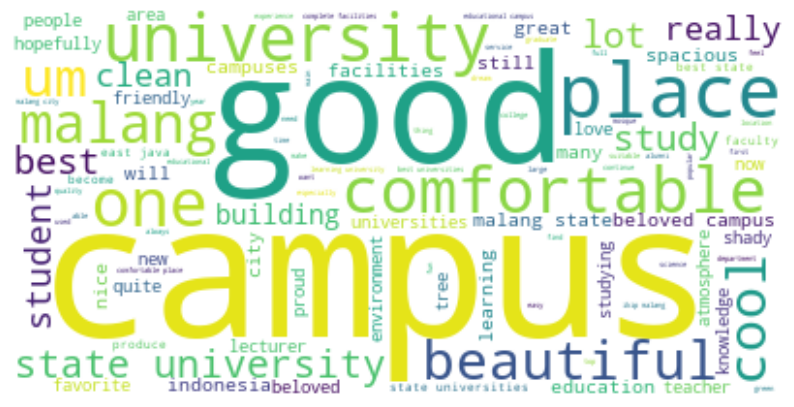

In [9]:
positive_reviews = df[df['sentiment'] == 'Positive']['review']

# Join all the reviews into one string
text = ' '.join(positive_reviews)

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

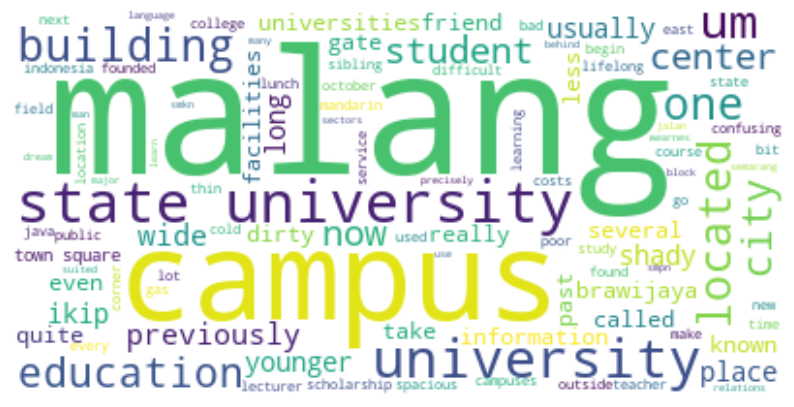

In [13]:
negative_reviews = df[df['sentiment'] == 'Negative']['review']

# Join all the reviews into one string
text = ' '.join(negative_reviews)

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**stopwords removal**

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Nafi
[nltk_data]     Kareem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nafi
[nltk_data]     Kareem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stopword = set(stopwords.words('english'))

In [22]:
stoplist_result = []
for index,row in df.iterrows():
    word_token = nltk.word_tokenize(row['review'])
    word_token = [word for word in word_token if not word in stopword]
    stoplist_result.append(" ".join(word_token))

df['review'] = stoplist_result
df

,review,polarity,sentiment
0,one popular campuses malang people friendly fa...,0.275000,Positive
1,visited take sister study many teachers study ...,0.537500,Positive
2,clean campus cool nice hanging hallway,0.438889,Positive
3,sunday morning try going morning walk wife bea...,0.359722,Positive
4,vocational faculty still new needs managed pro...,0.145455,Positive
...,...,...,...
1455,beautiful beautiful,0.850000,Positive
1459,beautiful campus,0.850000,Positive
1470,good,0.700000,Positive
1473,best campus,1.000000,Positive
